In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('AviationData.csv',encoding = "Latin-1", low_memory=False)

In [7]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
df.describe(include=object)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25589,27154,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [9]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [10]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [11]:
#Adding day, month & year column
df['Year'] = df['Event.Date'].dt.year
df['Month.Abbr'] = df['Event.Date'].dt.month_name().str[:3]
df['Day.Name.Abbr'] = df['Event.Date'].dt.day_name().str[:3]

# Adding weekend column
df.loc[(df['Day.Name.Abbr'] == 'Sat') | (df['Day.Name.Abbr'] == 'Sun'), 'Weekend'] = True
df.loc[(df['Day.Name.Abbr'] != 'Sat') & (df['Day.Name.Abbr'] != 'Sun'), 'Weekend'] = False




In [12]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Name.Abbr,Weekend
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,Oct,Sun,True
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,Jul,Thu,False
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,Aug,Fri,False
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,Jun,Sun,True
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,Aug,Thu,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022,Dec,Mon,False
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,2022,Dec,Mon,False
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022,Dec,Mon,False
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,2022,Dec,Mon,False


In [13]:
# Number of accidents per year
accidents_per_year = df.groupby(['Year'], as_index = False)['Event.Id'].count()
accidents_per_year

,Year,Event.Id
0,1948,1
1,1962,1
2,1974,1
3,1977,1
4,1979,2
5,1981,1
6,1982,3593
7,1983,3556
8,1984,3457
9,1985,3096


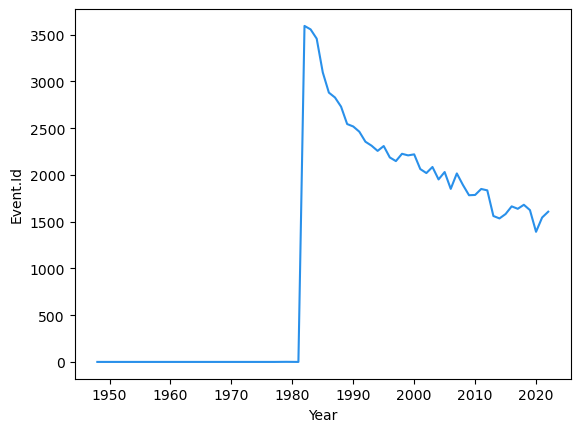

In [14]:
plot = sns.lineplot(x = 'Year', y = 'Event.Id', data = accidents_per_year, color = '#2990EA')

In [15]:
# Removing data before 1982
df = df[df['Year'] >= 1982]

In [16]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Name.Abbr,Weekend
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,Jan,Fri,False
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,Jan,Fri,False
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982,Jan,Fri,False
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,...,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,1982,Jan,Fri,False
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,NaN,NaN,NaN,TUSKEGEE,...,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982,1982,Jan,Fri,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022,Dec,Mon,False
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,2022,Dec,Mon,False
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022,Dec,Mon,False
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,2022,Dec,Mon,False


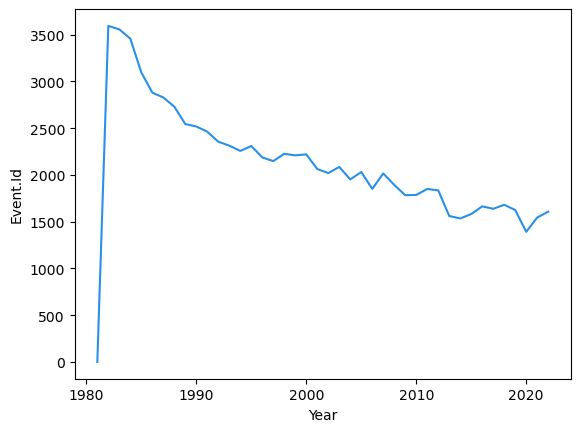

In [17]:
filtered_data = accidents_per_year[(accidents_per_year['Year'] >= 1980) & (accidents_per_year['Year'] <= 2022)]

#Creating graph
plot = sns.lineplot(x='Year', y='Event.Id', data=filtered_data, color='#2990EA')

plt.show()

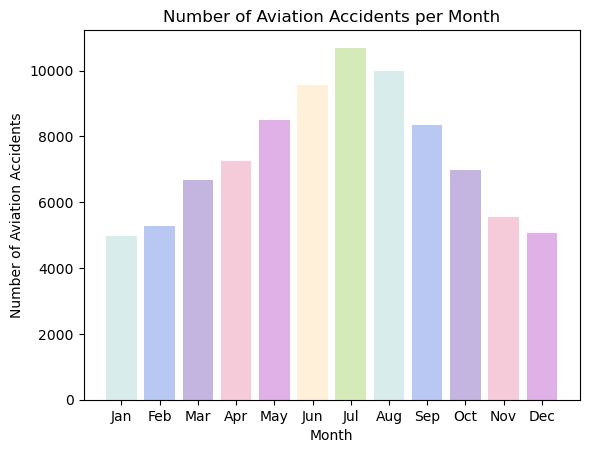

In [19]:
# Months with the most accidents

colors = ['#D9ECEC', '#B9C8F3', '#C3B4E0', '#F5CAD9', '#DFB1E6', '#FFF0D9', '#D4EBB9']

month_order = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
accidents_per_month = df['Month.Abbr'].value_counts().loc[month_order]

plt.bar(accidents_per_month.index, accidents_per_month, color= colors)

plt.xlabel('Month')
plt.ylabel('Number of Aviation Accidents')
plt.title('Number of Aviation Accidents per Month')


plt.show()

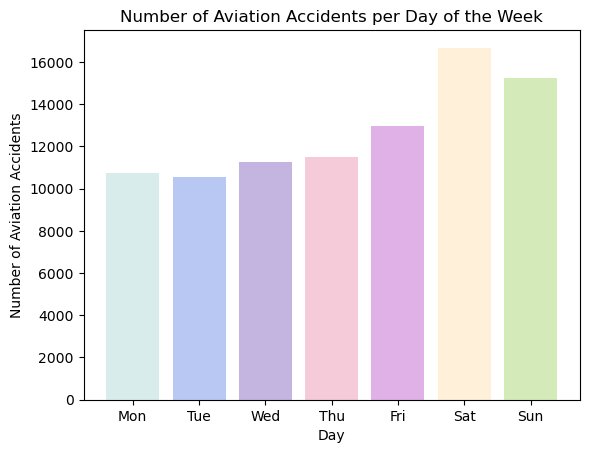

In [20]:
# Days with the most accidents

colors = ['#D9ECEC', '#B9C8F3', '#C3B4E0', '#F5CAD9', '#DFB1E6', '#FFF0D9', '#D4EBB9']  


# Days with the most accidents
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
accidents_per_day = df['Day.Name.Abbr'].value_counts().loc[day_order]

plt.bar(accidents_per_day.index, accidents_per_day, color = colors)

plt.xlabel('Day')
plt.ylabel('Number of Aviation Accidents')
plt.title('Number of Aviation Accidents per Day of the Week')


plt.show()




In [21]:
# Number of accidents per year
accidents_per_year = df.groupby(['Year'], as_index = False)['Event.Id'].count()
accidents_per_year

,Year,Event.Id
0,1982,3593
1,1983,3556
2,1984,3457
3,1985,3096
4,1986,2880
5,1987,2828
6,1988,2730
7,1989,2544
8,1990,2518
9,1991,2462


In [22]:
df['Injury.Severity'] = df['Injury.Severity'].str.split('(').str[0]
df['Injury.Severity'].value_counts()

C:\Users\chone\AppData\Local\Temp\ipykernel_14188\2187791544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Injury.Severity'] = df['Injury.Severity'].str.split('(').str[0]


Non-Fatal      67356
Fatal          17820
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: Injury.Severity, dtype: int64

In [23]:
# Number of fatal accidents per year
fatal_accidents_per_year = df[df['Injury.Severity'] == 'Fatal'].groupby(['Year'], as_index = False)['Event.Id'].count()
fatal_accidents_per_year

,Year,Event.Id
0,1982,655
1,1983,660
2,1984,629
3,1985,568
4,1986,527
5,1987,506
6,1988,510
7,1989,497
8,1990,513
9,1991,499


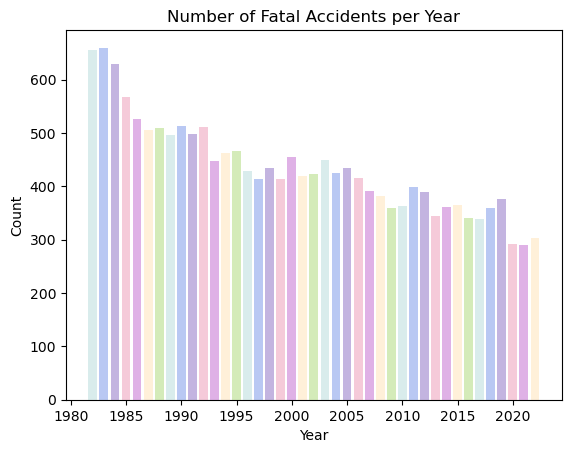

In [24]:
colors = ['#D9ECEC', '#B9C8F3', '#C3B4E0', '#F5CAD9', '#DFB1E6', '#FFF0D9', '#D4EBB9']  


plt.bar(fatal_accidents_per_year['Year'], fatal_accidents_per_year['Event.Id'], color=colors)


plt.title('Number of Fatal Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Count')


plt.show()